In [1]:
import pandas as pd

In [3]:
column_names = ['pregnant_count',
                'plasma_glucose',
                'bp',
                'skin_thickness',
                'insulin',
                'bmi',
                'dpf',
                'age',
                'label']

df = pd.read_csv('pima-indians-diabetes.csv',
                 names=column_names,
                 header=None)
df.head()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

pregnant_count    0
plasma_glucose    0
bp                0
skin_thickness    0
insulin           0
bmi               0
dpf               0
age               0
label             0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

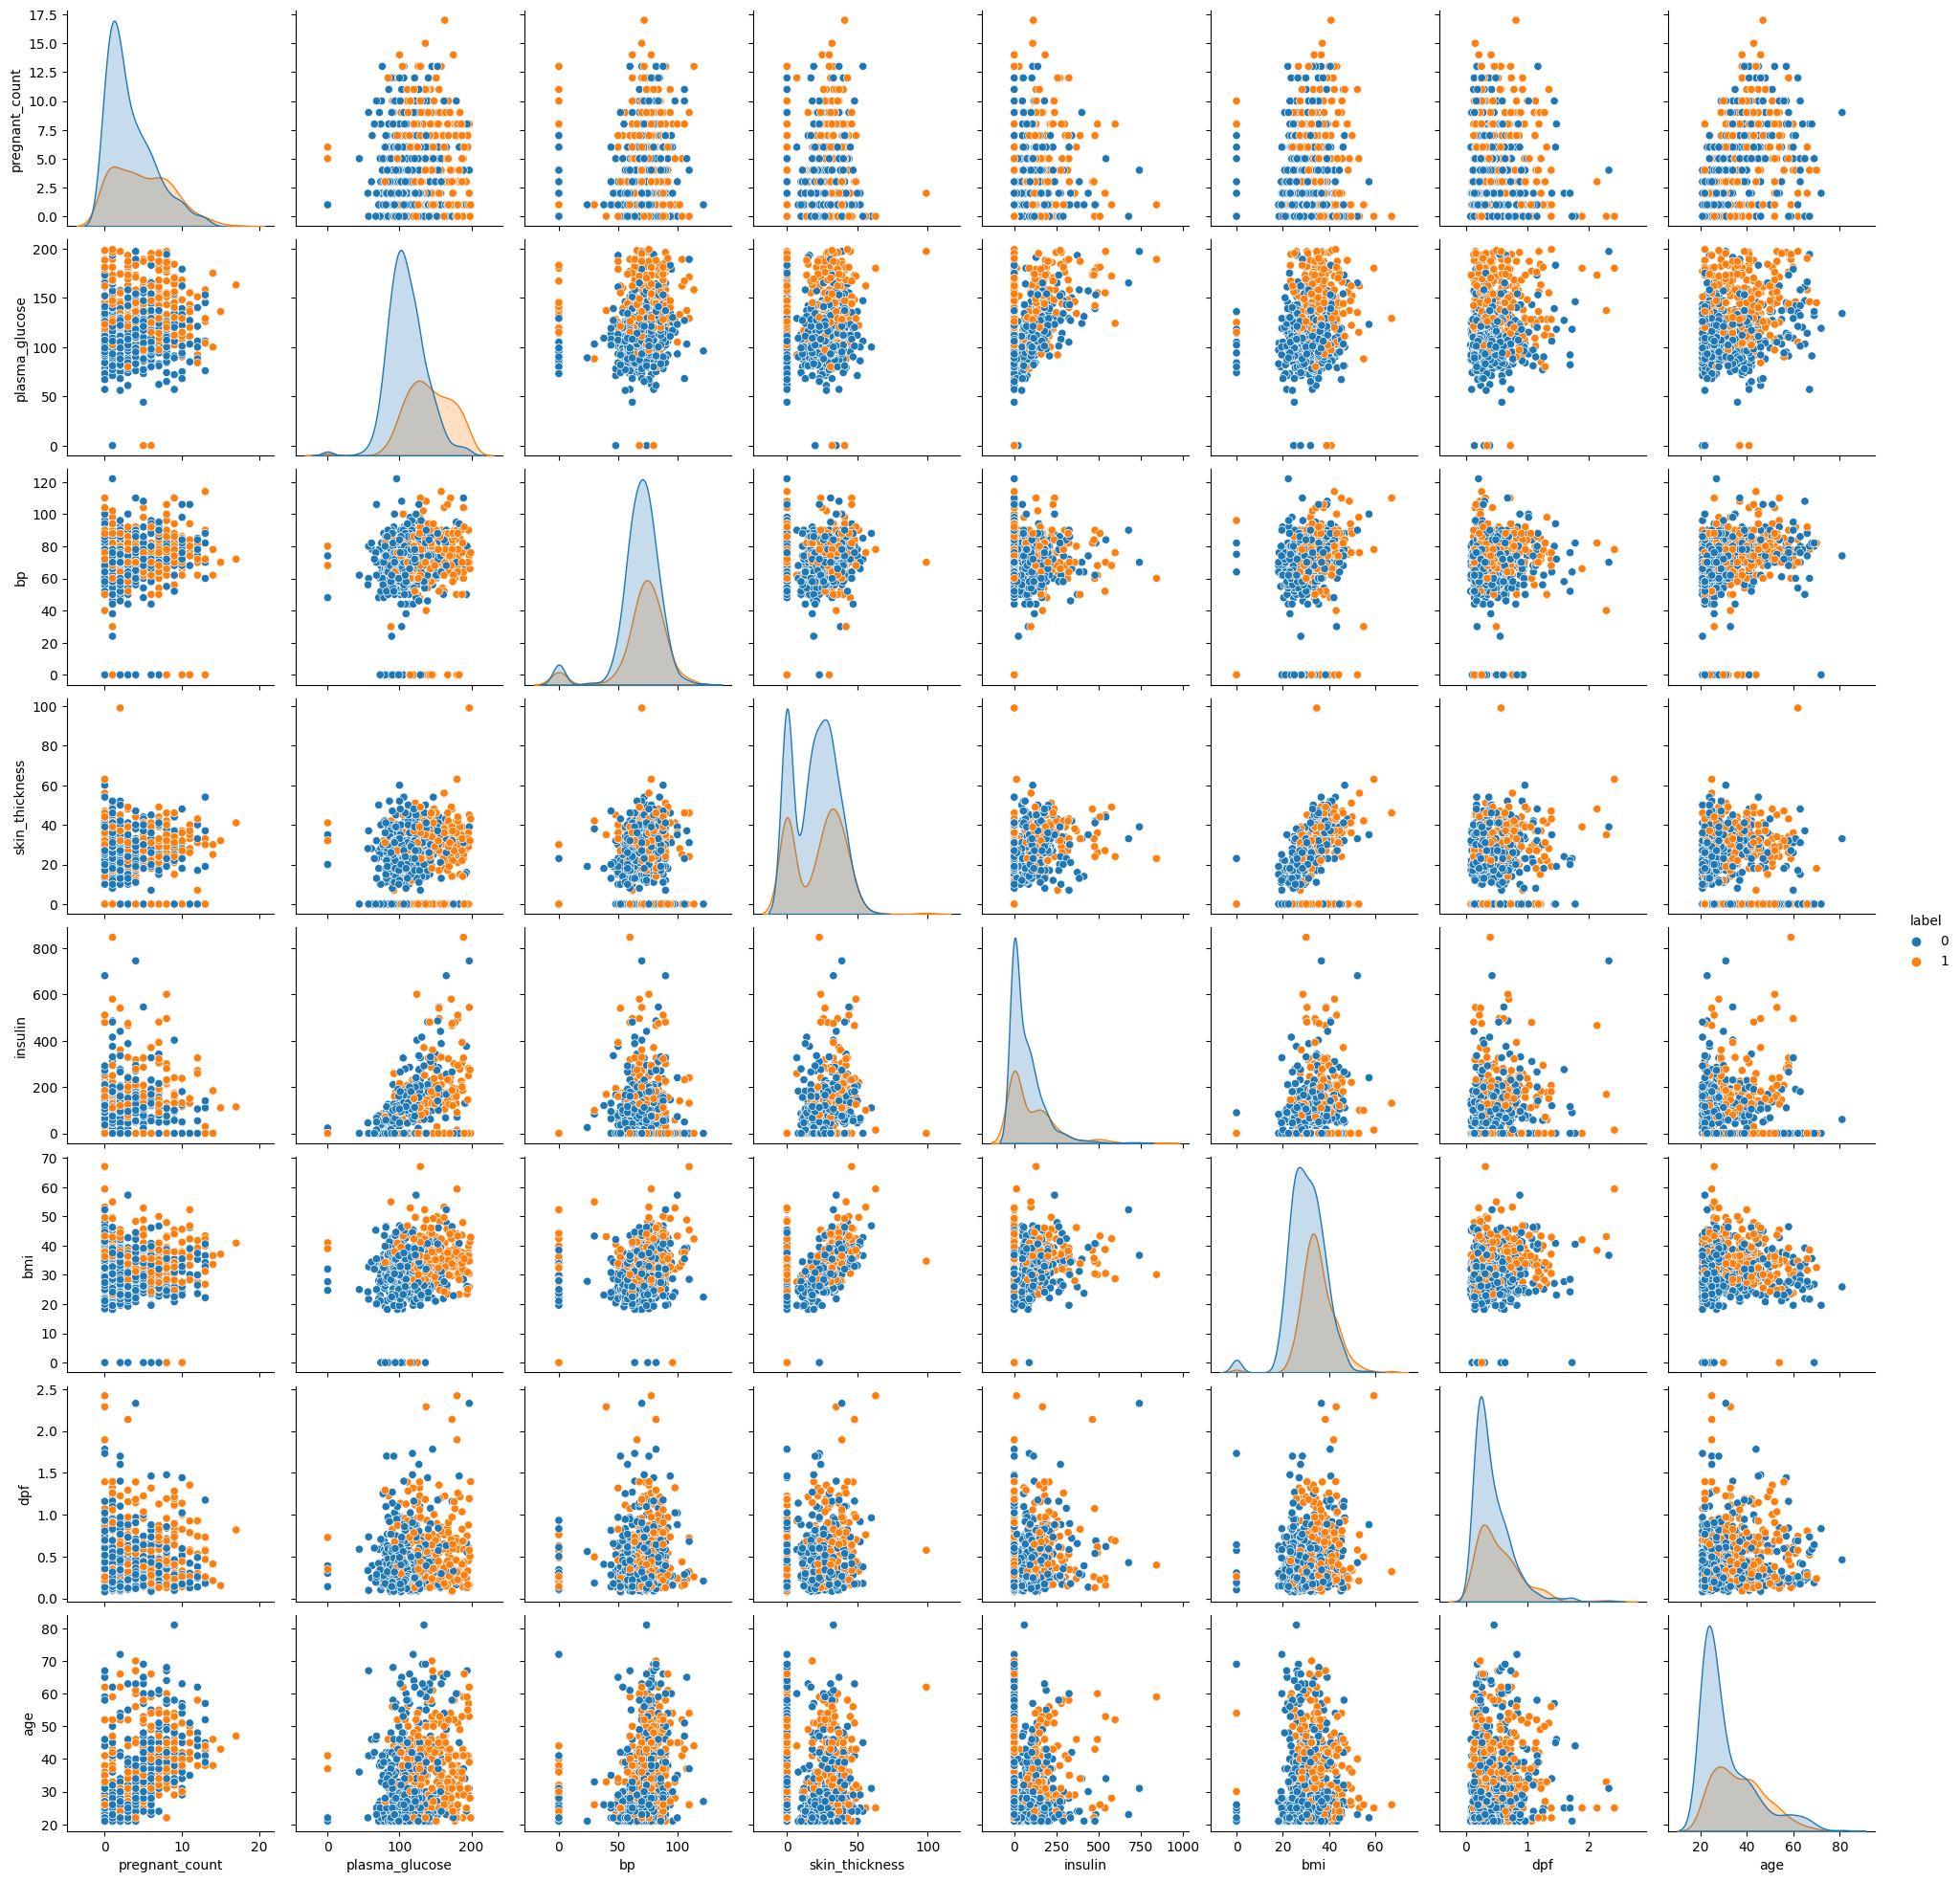

In [7]:
# sns pairplot
sns.pairplot(df, hue='label', vars=['pregnant_count', 'plasma_glucose', 'bp', 'skin_thickness', 'insulin', 'bmi', 'dpf', 'age'])

<AxesSubplot: xlabel='bmi', ylabel='age'>

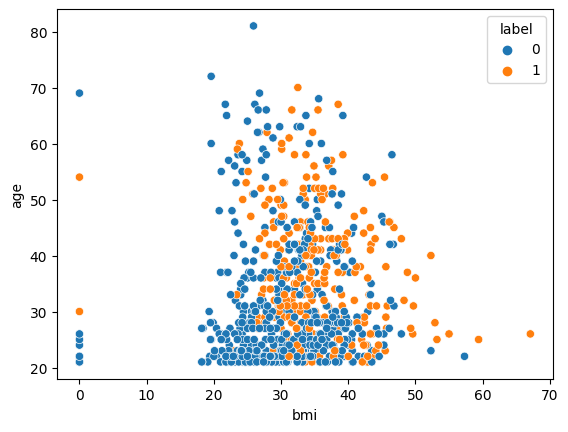

In [9]:
# plot bmi vs age
sns.scatterplot(x='bmi', y='age', hue='label', data=df)

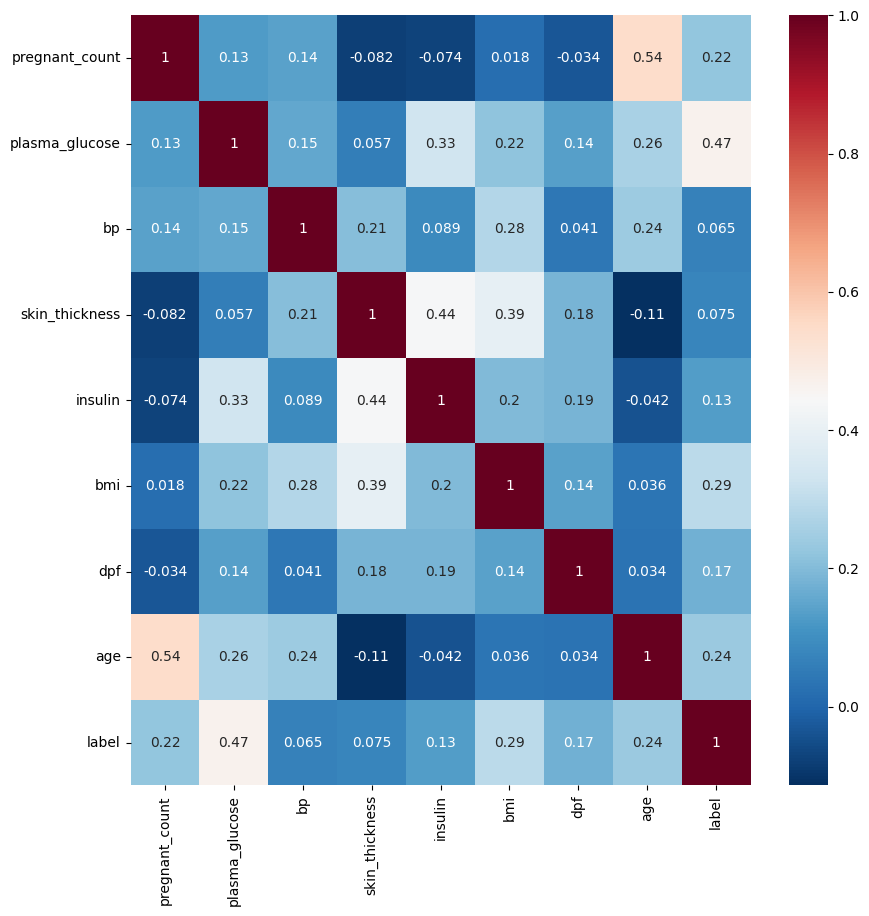

In [13]:
# heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r')
plt.show()

In [16]:
# train test split
from sklearn.model_selection import train_test_split
# Define X and y
X = df.drop('label', axis=1)
y = df['label']


In [17]:
X.head()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# normalize columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# train model linear regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

[[80 19]
 [18 37]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



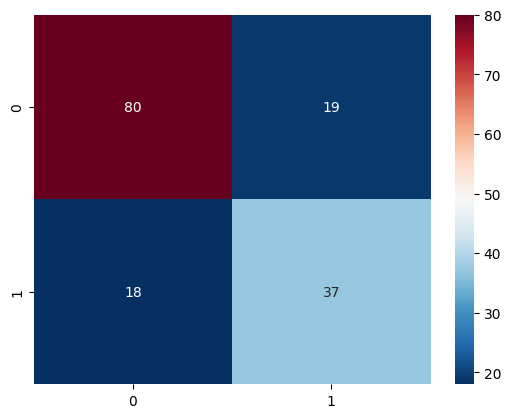

In [25]:
# predict for linear regression and plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = linear_model.predict(X_test_scaled)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu_r')
plt.show()

In [26]:
# train model logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

[[84 15]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



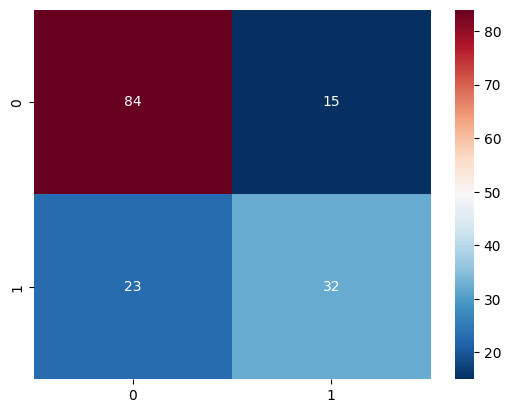

In [27]:
# predict for logistic regression and plot confusion matrix
y_pred = logistic_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu_r')
plt.show()